In [2]:
pip install mxnet

  Using cached mxnet-1.7.0.post2-py3-none-macosx_10_13_x86_64.whl (30.2 MB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade insightface

  Using cached insightface-0.1.5.tar.gz (12 kB)
  Using cached easydict-1.9.tar.gz (6.4 kB)
  Created wheel for insightface: filename=insightface-0.1.5-py3-none-any.whl size=16762 sha256=f87c6055aceee46143c83dca4dac09edbe455ea97b0288cbbbe299ae4a690350
  Stored in directory: /Users/dugongzzz/Library/Caches/pip/wheels/a9/51/21/b8eed0421ebb86a3ecccc6b142cd677a0d9222ed8aebe090b2
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6350 sha256=06a1640474af359ee710e4982b06d4415741dc912c2d273d9fb9df458ba23620
  Stored in directory: /Users/dugongzzz/Library/Caches/pip/wheels/5d/79/e4/4e55effe206295359b37e0f9db3e68a1197ba396682807dadb
Successfully built insightface easydict
Note: you may need to restart the kernel to use updated packages.


In [3]:
import insightface
import urllib
import urllib.request
import cv2
import numpy as np
import os
import pandas as pd
from glob import glob
import matplotlib.pylab as plt
from PIL import Image
import os
import tarfile

In [4]:
model = insightface.model_zoo.get_model('retinaface_r50_v1')

In [5]:
model.prepare(ctx_id = -1, nms=0.4)

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


In [4]:
# change directory accordingly
CURR_DIR = os.getcwd()
print(CURR_DIR)
INPUT_DIR = CURR_DIR + "/deepfake-detection-challenge/train_sample_videos"

/Users/dugongzzz/Documents/GitHub/cmpt733-deepfake-detection


In [5]:
videopaths = sorted(glob(os.path.join(INPUT_DIR, "*.mp4")))
print("Number of videos:", len(videopaths))

Number of videos: 18


In [6]:
meta = INPUT_DIR + '/metadata.json'
label_df = pd.read_json(meta)
label_df = label_df.iloc[0]
labeling_dict = label_df.to_dict()

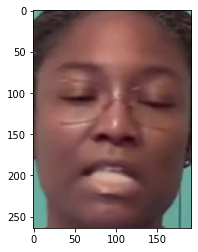

In [10]:
for i in range(len(videopaths)):
    num = str(i)
    name = os.path.basename(videopaths[i])
    
    v_cap = cv2.VideoCapture(videopaths[i])
    _, frame = v_cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.normalize(frame, frame, 0, 255, cv2.NORM_MINMAX)
    new_frame = Image.fromarray(frame)
    
    bbox, landmark = model.detect(frame, threshold=0.5, scale=1.0)
    for each in bbox:
        if labeling_dict[name] == 'FAKE':
                boundary = each.tolist()
                x, y, w, h  = boundary[0:4]
                detected_face = frame[int(y):int(h), int(x):int(w)]
                plt.imshow(detected_face)
                savepath = CURR_DIR + '/dataset/train_images/fake/img' + num + '.jpg'
                plt.imsave(savepath, detected_face)
        else:
                boundary = each.tolist()
                x, y, w, h  = boundary[0:4]
                detected_face = frame[int(y):int(h), int(x):int(w)]
                plt.imshow(detected_face)
                savepath = CURR_DIR + '/dataset/train_images/real/img' + num + '.jpg'
                plt.imsave(savepath, detected_face)